In [21]:
import geopandas as gpd
import pandas as pd
import os

In [22]:
from blocksnet import City

city = City.from_pickle('data/context_125.pickle')
blocks = city.get_blocks_gdf(True)

In [23]:
hex = gpd.read_file('data/potential.geojson')
hex = hex.to_crs(32636)
hex.head()

,Показатель: Население,Показатель: Транспорт,Показатель: Экология,Показатель: Социальная обеспеченность,Показатель: Инженерная инфраструктура,Потенциал: Жилая застройка - ИЖС,Потенциал: Жилая застройка - Малоэтажная,Потенциал: Жилая застройка - Среднеэтажная,Потенциал: Жилая застройка - Многоэтажная,Потенциал: Общественно-деловая,Потенциал: Рекреационная,Потенциал: Специального назначения,Потенциал: Промышленная,Потенциал: Сельско-хозяйственная,Потенциал: Транспортная инженерная,geometry
0,2.0,0.8,4.0,0.95,0.0,2,1,1,1,1,5,3,1,1,2,"POLYGON ((317670.823 6740264.216, 319634.160 6..."
1,1.0,0.2,5.0,0.20,0.0,2,1,1,1,1,5,3,1,1,1,"POLYGON ((568253.863 6619306.791, 570313.192 6..."
2,5.0,4.5,3.0,1.75,2.0,2,2,2,1,1,4,5,3,2,5,"POLYGON ((362823.532 6652667.884, 364807.777 6..."
3,1.0,1.4,5.0,0.45,0.0,2,1,1,1,1,5,3,1,1,1,"POLYGON ((591304.109 6758606.537, 593366.866 6..."
4,2.0,1.2,5.0,0.40,1.0,2,1,1,1,1,5,3,1,1,2,"POLYGON ((585213.734 6606749.118, 587279.485 6..."


In [24]:
blocks = blocks[['geometry']]
blocks

,geometry
id,
0,"POLYGON ((600006.160 6766357.496, 599999.219 6..."
1,"POLYGON ((600166.467 6766813.509, 600132.599 6..."
2,"POLYGON ((598507.322 6765577.420, 598581.191 6..."
3,"POLYGON ((594915.152 6769518.869, 594914.818 6..."
4,"POLYGON ((608010.242 6784836.946, 608009.380 6..."
...,...
79,"POLYGON ((619076.726 6782179.197, 619082.085 6..."
80,"POLYGON ((619163.605 6782811.476, 619164.363 6..."
81,"POLYGON ((619173.188 6783448.351, 619162.424 6..."


In [25]:
import geopandas as gpd
from shapely.geometry import Polygon

# Создание пространственного индекса
hex_sindex = hex.sindex

# Функция для получения hex с максимальной площадью пересечения
def get_max_overlap_hex(block, hex_gdf, hex_sindex):
    possible_matches_index = list(hex_sindex.intersection(block.geometry.bounds))
    possible_matches = hex_gdf.iloc[possible_matches_index]
    intersections = possible_matches[possible_matches.intersects(block.geometry)]
    
    if intersections.empty:
        return None

    intersections = intersections.copy()
    intersections['overlap_area'] = intersections.geometry.intersection(block.geometry).area
    max_overlap_hex = intersections.loc[intersections['overlap_area'].idxmax()]
    return max_overlap_hex

# Список колонок для переноса
columns_to_transfer = [
    'Показатель: Население',
    'Показатель: Транспорт',
    'Показатель: Экология',
    'Показатель: Социальная обеспеченность',
    'Показатель: Инженерная инфраструктура',
]

# Инициализация новых колонок
for col in columns_to_transfer:
    blocks[col] = None

# Перенос данных
for idx, block in blocks.iterrows():
    max_hex = get_max_overlap_hex(block, hex, hex_sindex)
    if max_hex is not None:
        for col in columns_to_transfer:
            blocks.at[idx, col] = max_hex[col]




In [26]:
blocks

,geometry,Показатель: Население,Показатель: Транспорт,Показатель: Экология,Показатель: Социальная обеспеченность,Показатель: Инженерная инфраструктура
id,,,,,,
0,"POLYGON ((600006.160 6766357.496, 599999.219 6...",1.0,0.0,5.0,0.4,0.0
1,"POLYGON ((600166.467 6766813.509, 600132.599 6...",1.0,0.0,5.0,0.45,0.0
2,"POLYGON ((598507.322 6765577.420, 598581.191 6...",1.0,0.8,5.0,0.4,0.0
3,"POLYGON ((594915.152 6769518.869, 594914.818 6...",0.0,0.0,5.0,0.25,0.0
4,"POLYGON ((608010.242 6784836.946, 608009.380 6...",0.0,0.0,5.0,0.45,0.0
...,...,...,...,...,...,...
79,"POLYGON ((619076.726 6782179.197, 619082.085 6...",0.0,0.0,5.0,0.825,0.0
80,"POLYGON ((619163.605 6782811.476, 619164.363 6...",0.0,0.0,5.0,0.825,0.0
81,"POLYGON ((619173.188 6783448.351, 619162.424 6...",0.0,0.0,5.0,0.825,0.0


In [27]:
main_map = {
    'Медицинский комплекс': {
        "Показатель: Население": 2,
        "Показатель: Транспорт": 3,
        "Показатель: Экология": 4,
        "Показатель: Социальная обеспеченность": 1,
        "Показатель: Инженерная инфраструктура": 5,
    },
    'Бизнес-кластер': {
        "Показатель: Население": 1,
        "Показатель: Транспорт": 2,
        "Показатель: Экология": 5,
        "Показатель: Социальная обеспеченность": 4,
        "Показатель: Инженерная инфраструктура": 3,
    },
    'Пром объект': {
        "Показатель: Население": 3,
        "Показатель: Транспорт": 1,
        "Показатель: Экология": 5,
        "Показатель: Социальная обеспеченность": 4,
        "Показатель: Инженерная инфраструктура": 2,
    },
    'Логистическо-складской комплекс': {
        "Показатель: Население": 3,
        "Показатель: Транспорт": 1,
        "Показатель: Экология": 5,
        "Показатель: Социальная обеспеченность": 4,
        "Показатель: Инженерная инфраструктура": 2,
    },
    'Кампус университетский': {
        "Показатель: Население": 1,
        "Показатель: Транспорт": 3,
        "Показатель: Экология": 4,
        "Показатель: Социальная обеспеченность": 2,
        "Показатель: Инженерная инфраструктура": 5
    },
    'Тур базы': {
        "Показатель: Население": 4,
        "Показатель: Транспорт": 1,
        "Показатель: Экология": 2,
        "Показатель: Социальная обеспеченность": 3,
        "Показатель: Инженерная инфраструктура": 5
    }
}

min_map = {
    'Медицинский комплекс': {
        "Показатель: Население": 5,
        "Показатель: Транспорт": 3,
        "Показатель: Экология": 4,
        "Показатель: Социальная обеспеченность": 0,
        "Показатель: Инженерная инфраструктура": 1,
    },
    'Бизнес-кластер': {
        "Показатель: Население": 5,
        "Показатель: Транспорт": 4,
        "Показатель: Экология": 1,
        "Показатель: Социальная обеспеченность": 2,
        "Показатель: Инженерная инфраструктура": 2,
    },
    'Пром объект': {
        "Показатель: Население": 2,
        "Показатель: Транспорт": 3,
        "Показатель: Экология": 0,
        "Показатель: Социальная обеспеченность": 1,
        "Показатель: Инженерная инфраструктура": 3,
    },
    'Логистическо-складской комплекс': {
        "Показатель: Население": 2,
        "Показатель: Транспорт": 3,
        "Показатель: Экология": 0,
        "Показатель: Социальная обеспеченность": 1,
        "Показатель: Инженерная инфраструктура": 3,
    },
    'Кампус университетский': {
        "Показатель: Население": 2,
        "Показатель: Транспорт": 3,
        "Показатель: Экология": 3,
        "Показатель: Социальная обеспеченность": 2,
        "Показатель: Инженерная инфраструктура": 3
    },
    'Тур базы': {
        "Показатель: Население": 1,
        "Показатель: Транспорт": 3,
        "Показатель: Экология": 4,
        "Показатель: Социальная обеспеченность": 1,
        "Показатель: Инженерная инфраструктура": 2    
    }
}

In [35]:
import numpy as np

for object_name, ranks in main_map.items():
    # Получаем минимальные значения для показателей из min_map
    current_min_map = min_map[object_name]
    
    # Определяем число показателей
    n = len(ranks)
    
    # Считаем знаменатель для весов
    denominator = sum([n - rank + 1 for rank in ranks.values()])
    
    # Создаём массив для хранения оценки потенциала
    potential_scores = np.zeros(len(blocks))
    
    # Для каждого показателя рассчитываем вклад в оценку потенциала
    for indicator, rank in ranks.items():
        weight = (n - rank + 1) / denominator  # Вес показателя
        # Векторно вычисляем разницу и умножаем на вес
        score = (blocks[indicator] - current_min_map[indicator]) * weight
        potential_scores += score  # Суммируем вклад в общий потенциал
    
    # Заменяем отрицательные значения на 0
    potential_scores = np.where(potential_scores < 0, 0, potential_scores)
    
    # # Округляем значения до 2 знаков после запятой
    # potential_scores = np.round(potential_scores, 2)
    
    # Добавляем новый столбец для текущего объекта в GeoDataFrame
    column_name = f'Потенциал: {object_name}'
    blocks[column_name] = potential_scores
blocks

,geometry,Показатель: Население,Показатель: Транспорт,Показатель: Экология,Показатель: Социальная обеспеченность,Показатель: Инженерная инфраструктура,Потенциал: Медицинский комплекс,Потенциал: Бизнес-кластер,Потенциал: Пром объект,Потенциал: Логистическо-складской комплекс,Потенциал: Кампус университетский,Потенциал: Тур базы
id,,,,,,,,,,,,
0,"POLYGON ((600006.160 6766357.496, 599999.219 6...",1.0,0.0,5.0,0.4,0.0,0,0,0,0,0,0
1,"POLYGON ((600166.467 6766813.509, 600132.599 6...",1.0,0.0,5.0,0.45,0.0,0,0,0,0,0,0
2,"POLYGON ((598507.322 6765577.420, 598581.191 6...",1.0,0.8,5.0,0.4,0.0,0,0,0,0,0,0
3,"POLYGON ((594915.152 6769518.869, 594914.818 6...",0.0,0.0,5.0,0.25,0.0,0,0,0,0,0,0
4,"POLYGON ((608010.242 6784836.946, 608009.380 6...",0.0,0.0,5.0,0.45,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
79,"POLYGON ((619076.726 6782179.197, 619082.085 6...",0.0,0.0,5.0,0.825,0.0,0,0,0,0,0,0
80,"POLYGON ((619163.605 6782811.476, 619164.363 6...",0.0,0.0,5.0,0.825,0.0,0,0,0,0,0,0
81,"POLYGON ((619173.188 6783448.351, 619162.424 6...",0.0,0.0,5.0,0.825,0.0,0,0,0,0,0,0


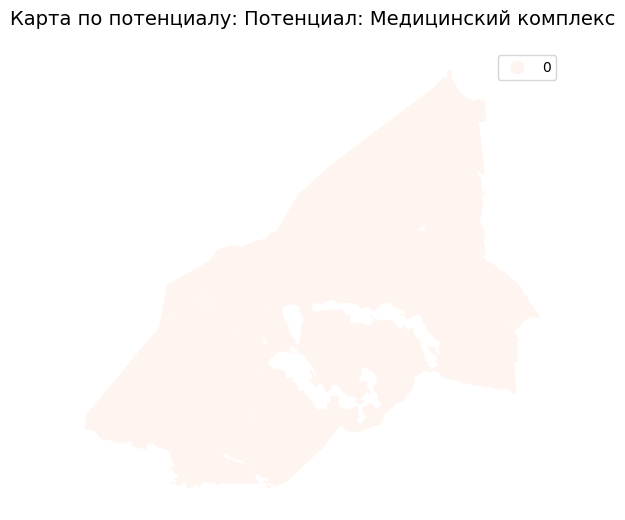

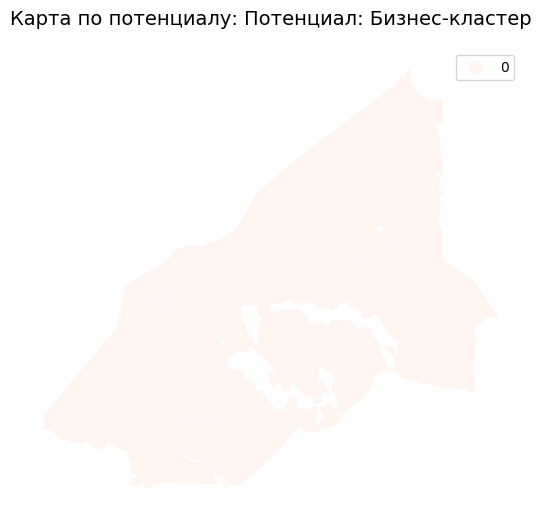

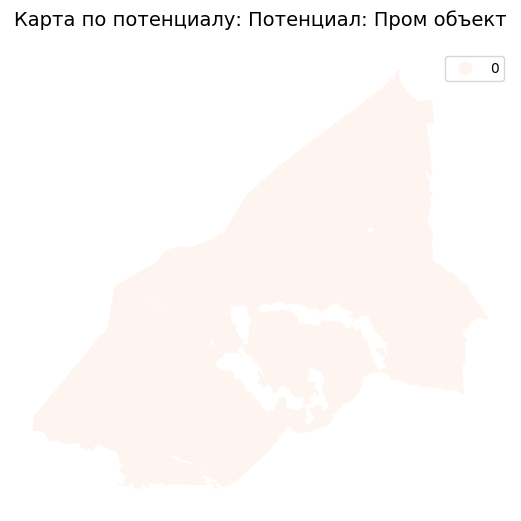

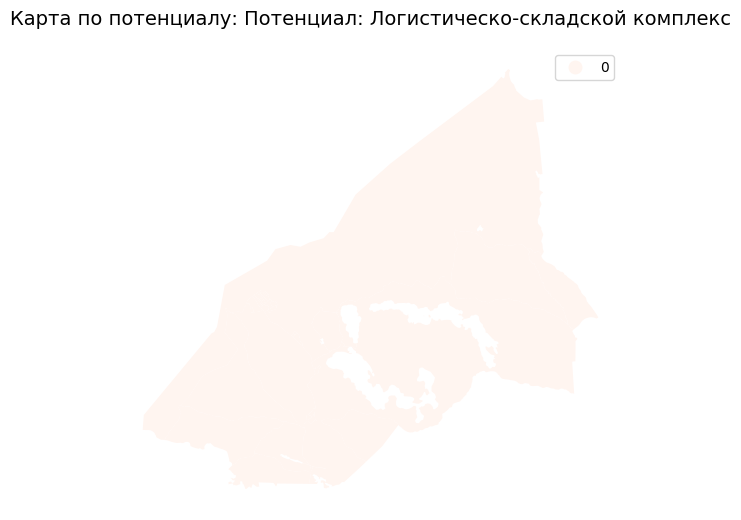

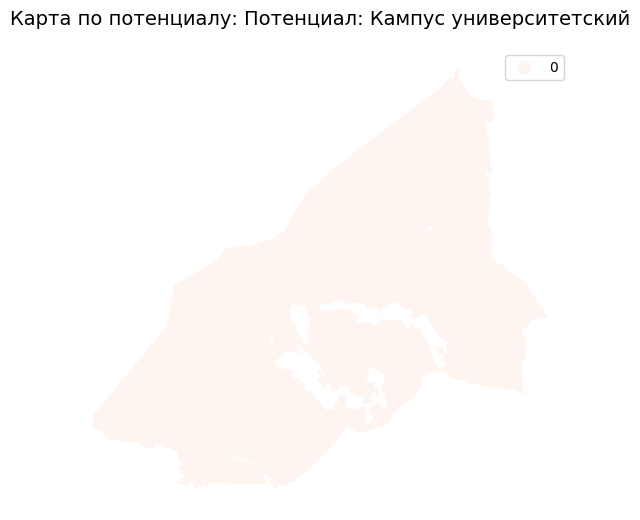

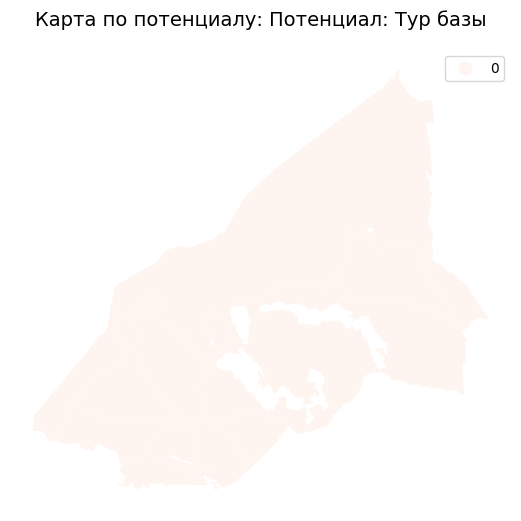

In [29]:
import matplotlib.pyplot as plt

# Предполагается, что у вас есть GeoDataFrame 'blocks'
# со столбцами "Потенциал: ..."

# Находим все столбцы потенциалов
potential_columns = [col for col in blocks.columns if col.startswith("Потенциал:")]

for object_column in potential_columns:
    fig, ax = plt.subplots(figsize=(10,6))
    # Отображаем геоданные с раскраской по столбцу потенциала
    blocks.plot(column=object_column, ax=ax, legend=True, cmap='Reds')
    ax.set_title(f"Карта по потенциалу: {object_column}", fontsize=14)
    ax.set_axis_off()
    plt.show()

In [32]:
import numpy as np

for object_name, ranks in main_map.items():
    # Получаем минимальные значения для показателей из min_map
    current_min_map = min_map[object_name]
    
    # Определяем число показателей
    n = len(ranks)
    
    # Считаем знаменатель для весов
    denominator = sum([n - rank + 1 for rank in ranks.values()])
    
    # Создаём массив для хранения оценки потенциала
    potential_scores = np.zeros(len(hex))
    
    # Для каждого показателя рассчитываем вклад в оценку потенциала
    for indicator, rank in ranks.items():
        weight = (n - rank + 1) / denominator  # Вес показателя
        # Векторно вычисляем разницу и умножаем на вес
        score = (hex[indicator] - current_min_map[indicator]) * weight
        potential_scores += score  # Суммируем вклад в общий потенциал
    
    # Заменяем отрицательные значения на 0
    potential_scores = np.where(potential_scores < 0, 0, potential_scores)
    
    # Округляем значения до 2 знаков после запятой
    potential_scores = np.round(potential_scores, 2)
    
    # Добавляем новый столбец для текущего объекта в GeoDataFrame
    column_name = f'Потенциал: {object_name}'
    hex[column_name] = potential_scores
hex

,Показатель: Население,Показатель: Транспорт,Показатель: Экология,Показатель: Социальная обеспеченность,Показатель: Инженерная инфраструктура,Потенциал: Жилая застройка - ИЖС,Потенциал: Жилая застройка - Малоэтажная,Потенциал: Жилая застройка - Среднеэтажная,Потенциал: Жилая застройка - Многоэтажная,Потенциал: Общественно-деловая,...,Потенциал: Промышленная,Потенциал: Сельско-хозяйственная,Потенциал: Транспортная инженерная,geometry,Потенциал: Медицинский комплекс,Потенциал: Бизнес-кластер,Потенциал: Пром объект,Потенциал: Логистическо-складской комплекс,Потенциал: Кампус университетский,Потенциал: Тур базы
0,2.0,0.8,4.0,0.950,0.0,2,1,1,1,1,...,1,1,2,"POLYGON ((317670.823 6740264.216, 319634.160 6...",0.00,0.00,0.00,0.00,0.00,0.00
1,1.0,0.2,5.0,0.200,0.0,2,1,1,1,1,...,1,1,1,"POLYGON ((568253.863 6619306.791, 570313.192 6...",0.00,0.00,0.00,0.00,0.00,0.00
2,5.0,4.5,3.0,1.750,2.0,2,2,2,1,1,...,3,2,5,"POLYGON ((362823.532 6652667.884, 364807.777 6...",0.82,0.23,1.13,1.13,1.17,0.92
3,1.0,1.4,5.0,0.450,0.0,2,1,1,1,1,...,1,1,1,"POLYGON ((591304.109 6758606.537, 593366.866 6...",0.00,0.00,0.00,0.00,0.00,0.00
4,2.0,1.2,5.0,0.400,1.0,2,1,1,1,1,...,1,1,2,"POLYGON ((585213.734 6606749.118, 587279.485 6...",0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,3.0,2.0,4.0,0.850,1.0,3,2,1,1,1,...,2,2,3,"POLYGON ((275820.331 6721754.715, 277769.288 6...",0.00,0.00,0.00,0.00,0.00,0.00
2144,1.0,2.5,4.0,0.775,1.0,3,1,1,1,1,...,1,1,2,"POLYGON ((491213.137 6625732.657, 493244.741 6...",0.00,0.00,0.00,0.00,0.00,0.00
2145,2.0,0.7,4.0,0.650,0.0,2,1,1,1,1,...,1,1,2,"POLYGON ((473229.056 6567851.816, 475256.376 6...",0.00,0.00,0.00,0.00,0.00,0.00
2146,3.0,3.4,4.0,1.875,0.0,3,3,1,1,1,...,2,2,4,"POLYGON ((337594.865 6697592.326, 339567.742 6...",0.10,0.00,0.00,0.00,0.31,0.44


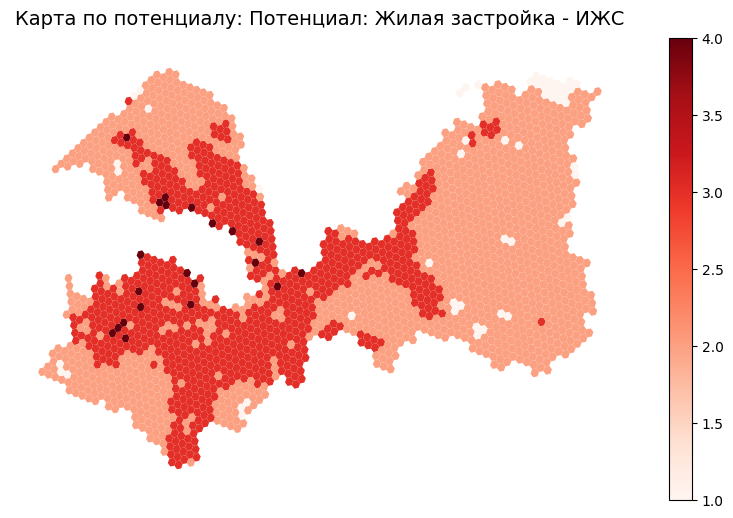

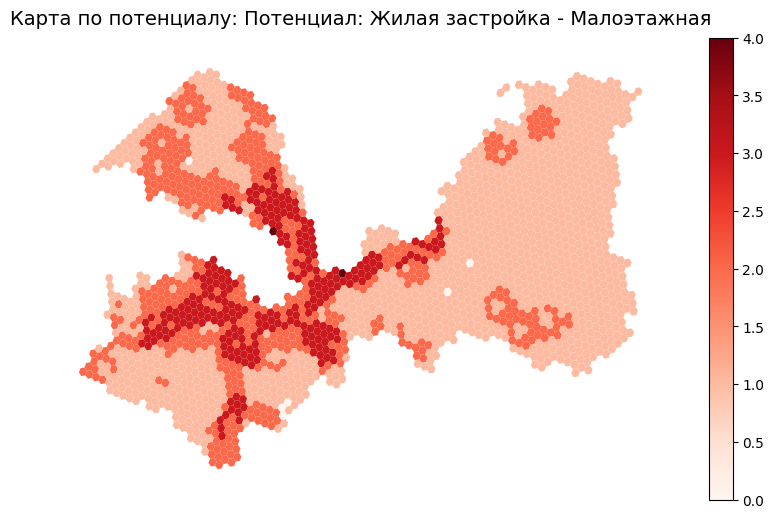

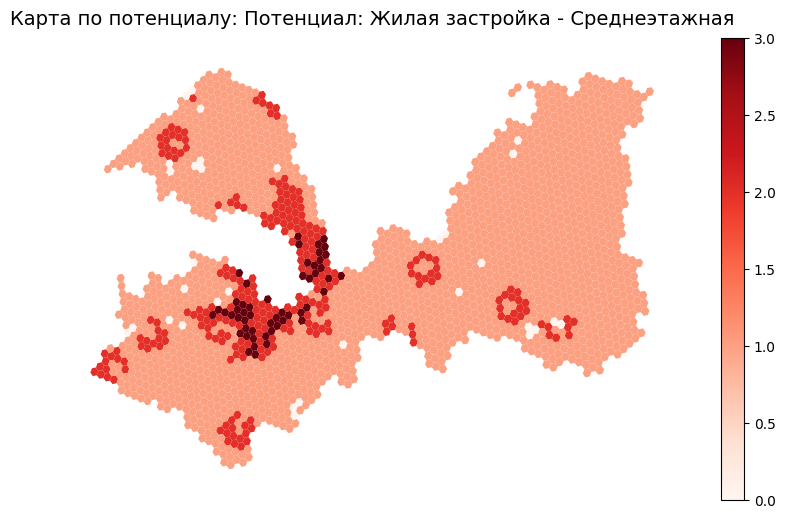

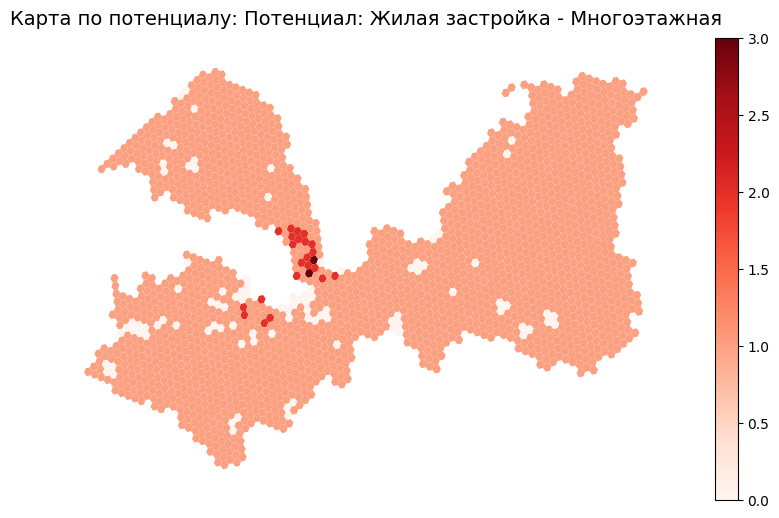

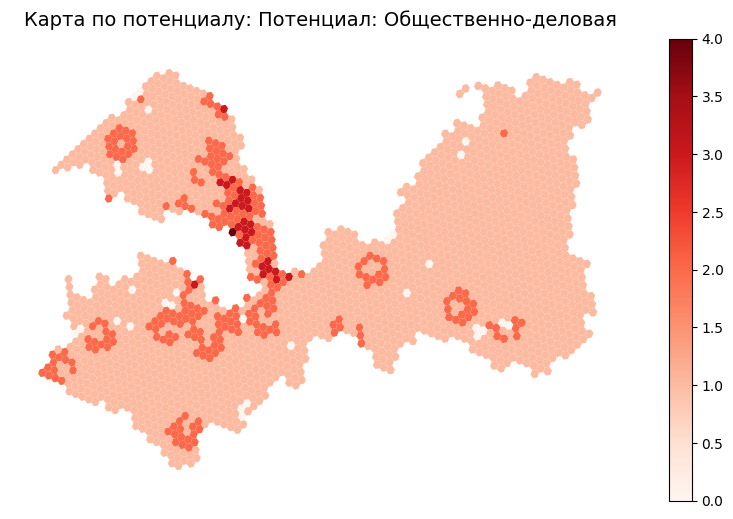

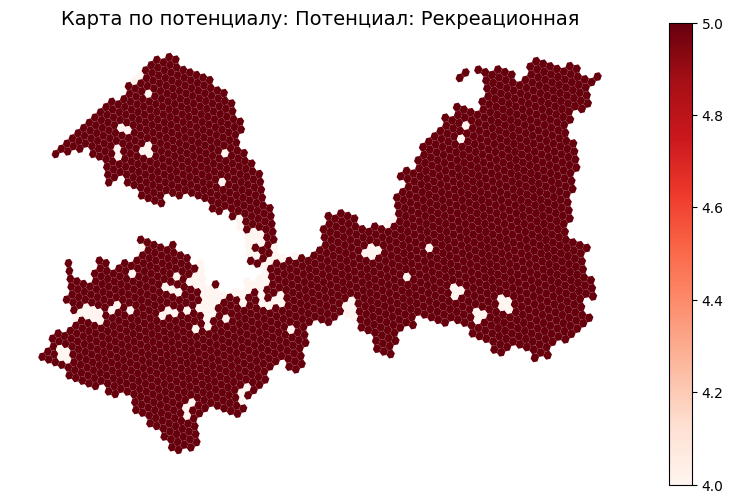

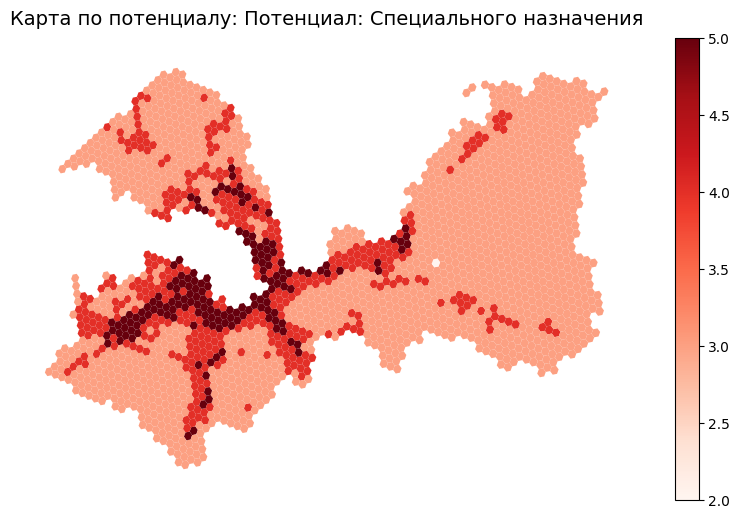

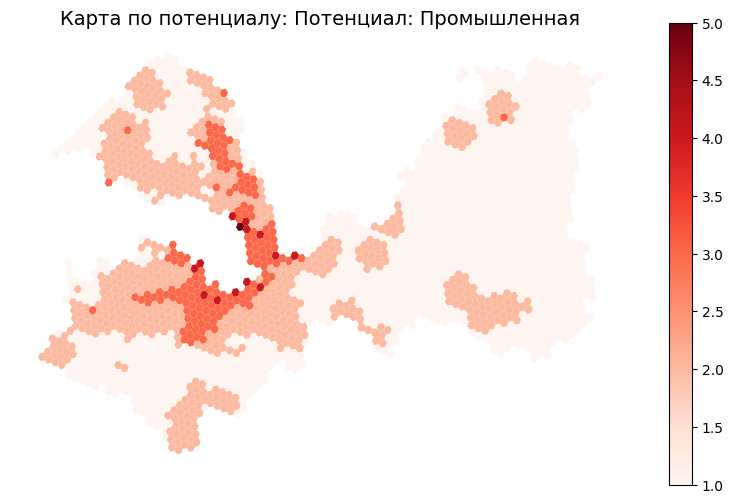

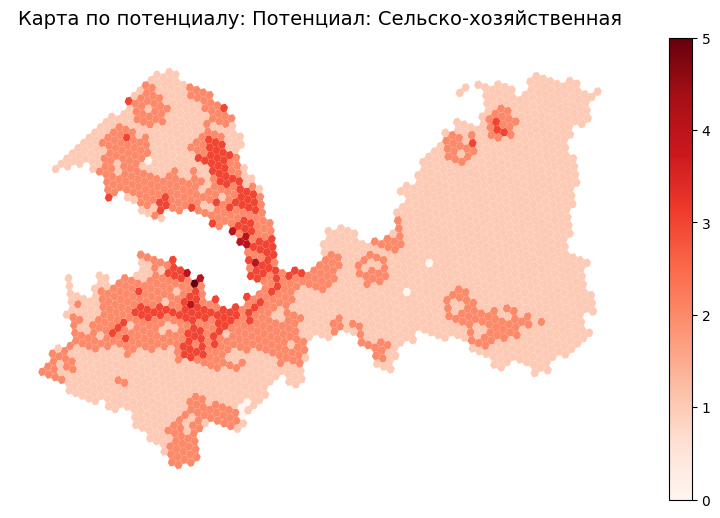

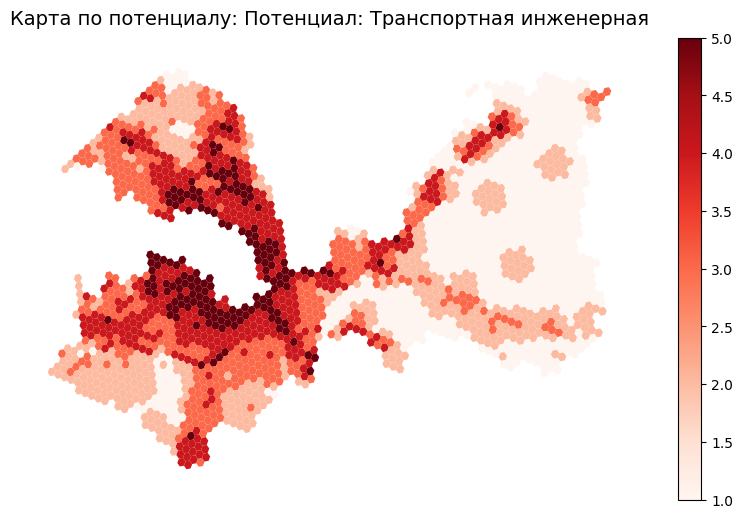

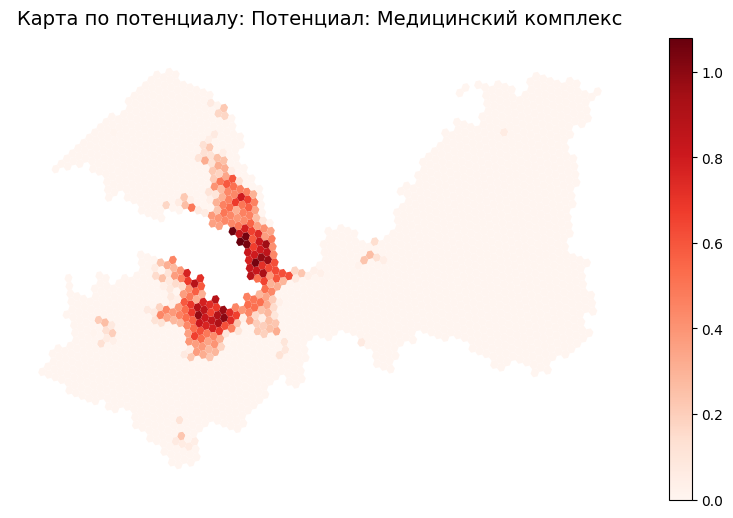

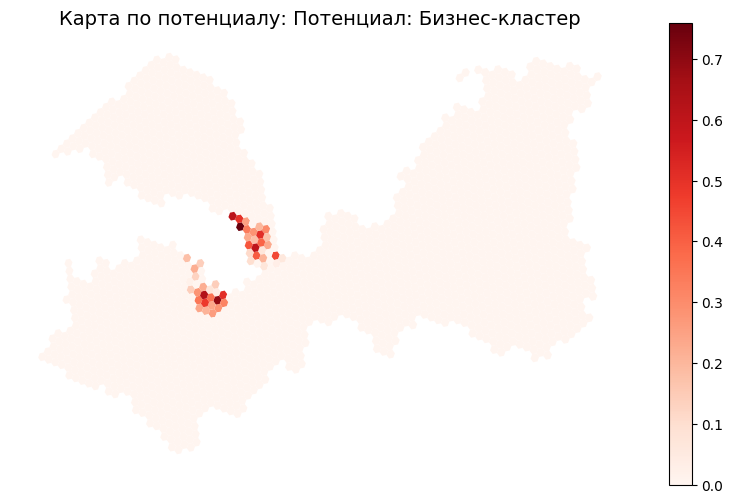

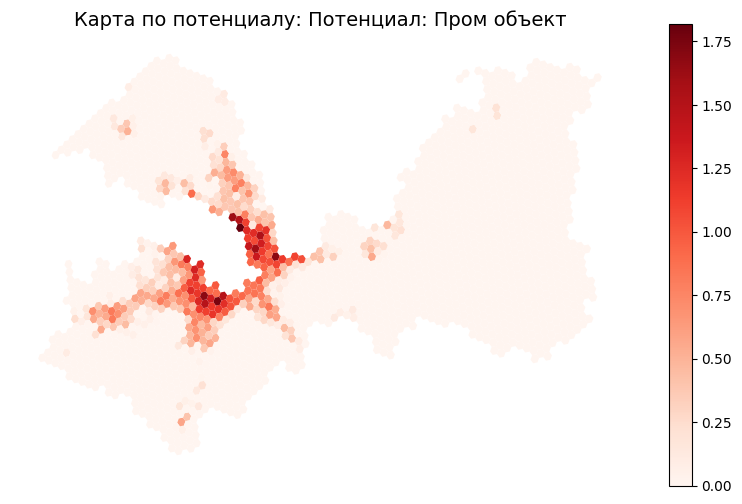

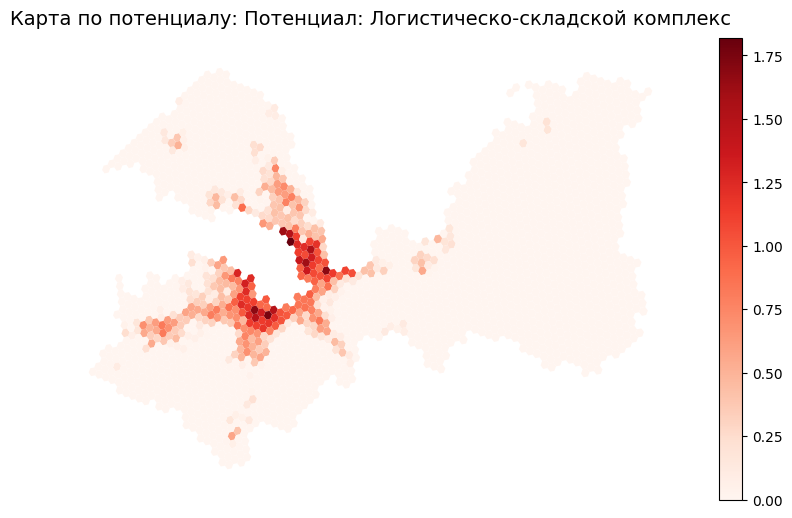

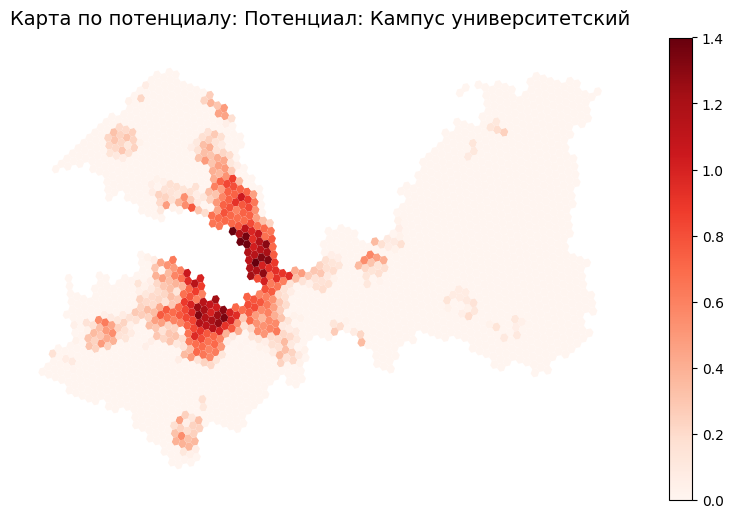

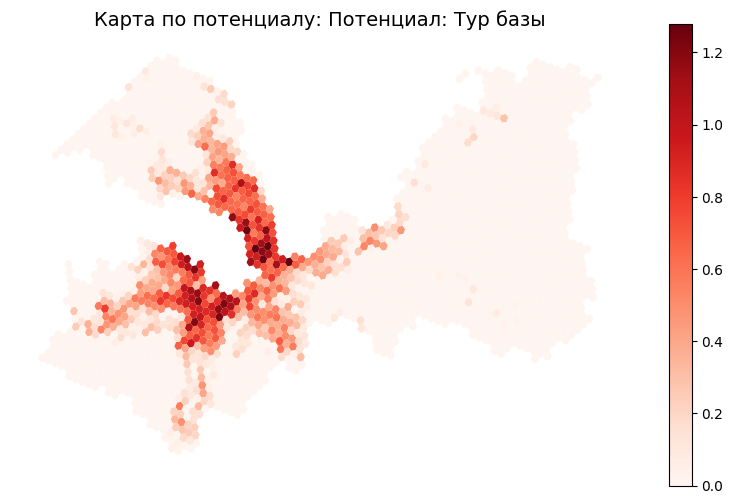

In [33]:
import matplotlib.pyplot as plt

# Предполагается, что у вас есть GeoDataFrame 'blocks'
# со столбцами "Потенциал: ..."

# Находим все столбцы потенциалов
potential_columns = [col for col in hex.columns if col.startswith("Потенциал:")]

for object_column in potential_columns:
    fig, ax = plt.subplots(figsize=(10,6))
    # Отображаем геоданные с раскраской по столбцу потенциала
    hex.plot(column=object_column, ax=ax, legend=True, cmap='Reds')
    ax.set_title(f"Карта по потенциалу: {object_column}", fontsize=14)
    ax.set_axis_off()
    plt.show()
